In [41]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [42]:
filename = '../../outputs/correlation-05-17-2021_14-43-14.csv'
df = pd.read_csv(filename)
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)] ##Gets rid of infs, NaNs

In [43]:
over_90 = df[df.test_acc > 0.9]
x = "quality_L2"
y = "test_acc"
print(over_90.shape)
print(over_90.columns)

(485, 38)
Index(['model_num', 'test_acc', 'test_loss', 'train_acc', 'train_loss',
       'quality_L1', 'quality_L2', 'quality_prod', 'KG_L1', 'MC_L1', 'MC_L3',
       'ER_L1', 'mquality_L1', 'mquality_prod', 'mquality-wL1', 'mquality-wp',
       'qlayer0mode3', 'qlayer0mode4', 'qlayer-1mode3', 'qlayer-1mode4', 'KG0',
       'KG-1', 'MC0', 'MC-1', 'qnL1', 'qnL3', 'qnL4', 'qnL5', 'qnrL1', 'qnrL3',
       'qnrL4', 'qnrL5', 'qnprL1', 'qnprL3', 'qnprL4', 'qnprL5', 'qnrL6',
       'qnrL7'],
      dtype='object')


In [44]:
cols = ['quality_L1', 'quality_L2', 'quality_prod', 'KG_L1', 'MC_L1', 'MC_L3',
       'ER_L1', 'mquality_L1', 'mquality_prod', 'mquality-wL1', 'mquality-wp',
       'qlayer0mode3', 'qlayer0mode4', 'qlayer-1mode3', 'qlayer-1mode4', 'KG0',
       'KG-1', 'MC0', 'MC-1', 'qnL1', 'qnL3', 'qnL4', 'qnL5', 'qnrL1', 'qnrL3',
       'qnrL4', 'qnrL5', 'qnprL1', 'qnprL3', 'qnprL4', 'qnprL5', 'qnrL6',
       'qnrL7']
test_acc_vec = over_90['test_acc']
train_acc_vec = over_90['train_acc']
gap = train_acc_vec - test_acc_vec
results = {}
results2 = {}

for x in cols:
    col = over_90[x]
    vec = col.to_numpy()
    results[x + "_test"] = stats.pearsonr(vec, test_acc_vec)[0]
    results[x + "_train"] = stats.pearsonr(vec, train_acc_vec)[0]
    results[x + "_gap"] = stats.pearsonr(vec, gap)[0]

    results2[x + "_test"] = stats.spearmanr(vec, test_acc_vec)[0]
    results2[x + "_train"] = stats.spearmanr(vec, train_acc_vec)[0]
    results2[x + "_gap"] = stats.spearmanr(vec, gap)[0]
    

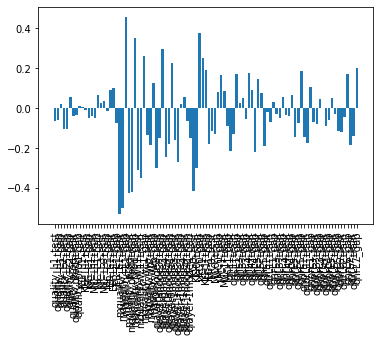

In [46]:
plt.bar(range(len(results2)), list(results2.values()), align='center');
plt.xticks(range(len(results2)), list(results2.keys()),rotation='vertical');

In [53]:
import operator
print(max(results, key=results.get), results[max(results, key=results.get)])
print(max(results2, key=results2.get), results2[max(results2, key=results2.get)])
print("\nOther Corr:\n")
print(min(results, key=results.get), results[min(results, key=results.get)])
print(min(results2, key=results2.get), results2[min(results2, key=results2.get)])

KG0_gap 0.36288976972220527
mquality_L1_gap 0.45940287364027454

Other Corr:

mquality_L1_test -0.49272347283102147
mquality_L1_test -0.5319003812441536


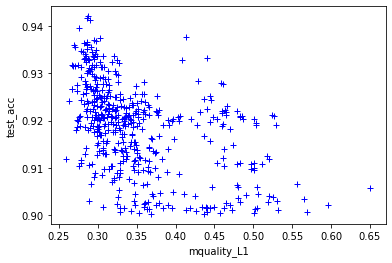

In [58]:
plt.plot(over_90['mquality_L1'],over_90['test_acc'], '+', color='blue')
plt.xlabel('mquality_L1')
plt.ylabel('test_acc')
#plt.ylim([0,1.1])
plt.show()

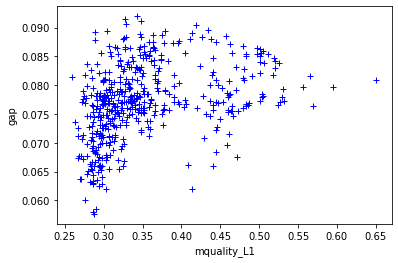

In [60]:
plt.plot(over_90['mquality_L1'],gap, '+', color='blue')
plt.xlabel('mquality_L1')
plt.ylabel('gap')
#plt.ylim([0,1.1])
plt.show()